**Nama Kelompok: Jagoan Neon** ü¶πüèª‚Äç‚ôÇÔ∏è‚ö°

**Kelas: MICRODENTIAL-002-UDINUS-04 Associate Data Scientist**

Studi Kasus: **Indeks Standar Pencemaran Udara (ISPU) Bulan Januari - Oktober Tahun 2021**

Metode Klasifikasi: **Logistic Regression**

Sumber: **Open Data Jakarta**

(Url Link: https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021)

**Import the Libraries**

In [29]:
# for basic mathematics operation 
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

# to inactivated warnings
import warnings 
warnings.filterwarnings('ignore')

**Exploratory Data Analysis and Pre-Processing**

Reading the Dataset

In [30]:
# importing the dataset
df=pd.read_csv("palingbener.csv")
df

tanggal                           stasiun  pm10  pm25   so2    co  \
0    2021-01-01                DKI1 (Bunderan HI)  38.0  53.0  29.0   6.0   
1    2021-01-02                DKI1 (Bunderan HI)  27.0  46.0  27.0   7.0   
2    2021-01-03                DKI1 (Bunderan HI)  44.0  58.0  25.0   7.0   
3    2021-01-04                DKI1 (Bunderan HI)  30.0  48.0  24.0   4.0   
4    2021-01-05                DKI1 (Bunderan HI)  38.0  53.0  24.0   6.0   
..          ...                               ...   ...   ...   ...   ...   
753  2021-10-27  DKI5 (Kebon Jeruk) Jakarta Barat  53.0  76.0   NaN  11.0   
754  2021-10-28  DKI5 (Kebon Jeruk) Jakarta Barat  51.0  77.0   NaN  16.0   
755  2021-10-29  DKI5 (Kebon Jeruk) Jakarta Barat  50.0  70.0   NaN  18.0   
756  2021-10-30  DKI5 (Kebon Jeruk) Jakarta Barat  50.0  74.0   NaN  12.0   
757  2021-10-31  DKI5 (Kebon Jeruk) Jakarta Barat  49.0  74.0   NaN  10.0   

       o3   no2  max critical categori  
0    31.0  13.0   53     PM25   SEDANG  
1    47.0   7.0   47       O3     BAIK  
2    40.0  13.0   58     PM25   SEDANG  
3    32.0   7.0   48     PM25     BAIK  
4    31.0   9.0   53     PM25   SEDANG  
..    ...   ...  ...      ...      ...  
753  32.0  17.0   76     PM25   SEDANG  
754  29.0  27.0   77     PM25   SEDANG  
755  23.0  33.0   70     PM25   SEDANG  
756  30.0  24.0   74     PM25   SEDANG  
757  31.0  13.0   74     PM25   SEDANG  

[758 rows x 11 columns]

In [31]:
# deleting tanggal, max, and critical column
df=df.drop(["tanggal","max","critical"],axis=1)

In [32]:
# showing the dataframe
df

stasiun  pm10  pm25   so2    co    o3   no2  \
0                  DKI1 (Bunderan HI)  38.0  53.0  29.0   6.0  31.0  13.0   
1                  DKI1 (Bunderan HI)  27.0  46.0  27.0   7.0  47.0   7.0   
2                  DKI1 (Bunderan HI)  44.0  58.0  25.0   7.0  40.0  13.0   
3                  DKI1 (Bunderan HI)  30.0  48.0  24.0   4.0  32.0   7.0   
4                  DKI1 (Bunderan HI)  38.0  53.0  24.0   6.0  31.0   9.0   
..                                ...   ...   ...   ...   ...   ...   ...   
753  DKI5 (Kebon Jeruk) Jakarta Barat  53.0  76.0   NaN  11.0  32.0  17.0   
754  DKI5 (Kebon Jeruk) Jakarta Barat  51.0  77.0   NaN  16.0  29.0  27.0   
755  DKI5 (Kebon Jeruk) Jakarta Barat  50.0  70.0   NaN  18.0  23.0  33.0   
756  DKI5 (Kebon Jeruk) Jakarta Barat  50.0  74.0   NaN  12.0  30.0  24.0   
757  DKI5 (Kebon Jeruk) Jakarta Barat  49.0  74.0   NaN  10.0  31.0  13.0   

    categori  
0     SEDANG  
1       BAIK  
2     SEDANG  
3       BAIK  
4     SEDANG  
..       ...  
753   SEDANG  
754   SEDANG  
755   SEDANG  
756   SEDANG  
757   SEDANG  

[758 rows x 8 columns]

In [33]:
# showing a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stasiun   758 non-null    object 
 1   pm10      731 non-null    float64
 2   pm25      688 non-null    float64
 3   so2       687 non-null    float64
 4   co        757 non-null    float64
 5   o3        755 non-null    float64
 6   no2       746 non-null    float64
 7   categori  758 non-null    object 
dtypes: float64(6), object(2)
memory usage: 47.5+ KB


In [34]:
# le = preprocessing.LabelEncoder()
# le.fit(df['categori'])
# df['categori']=le.transform(df['categori'])

In [35]:
# checking if there is any NULL data
df.isna().sum()

stasiun      0
pm10        27
pm25        70
so2         71
co           1
o3           3
no2         12
categori     0
dtype: int64

In [36]:
#fill NA/NaN values

df[["pm25","pm10","so2","co","o3","no2"]]=df[["pm25","pm10","so2","co","o3","no2"]].fillna(df[["pm25","pm10","so2","co","o3","no2"]].mean())

In [37]:
# checking is NA/NaN values filled already
df.isna().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

Data Visualization

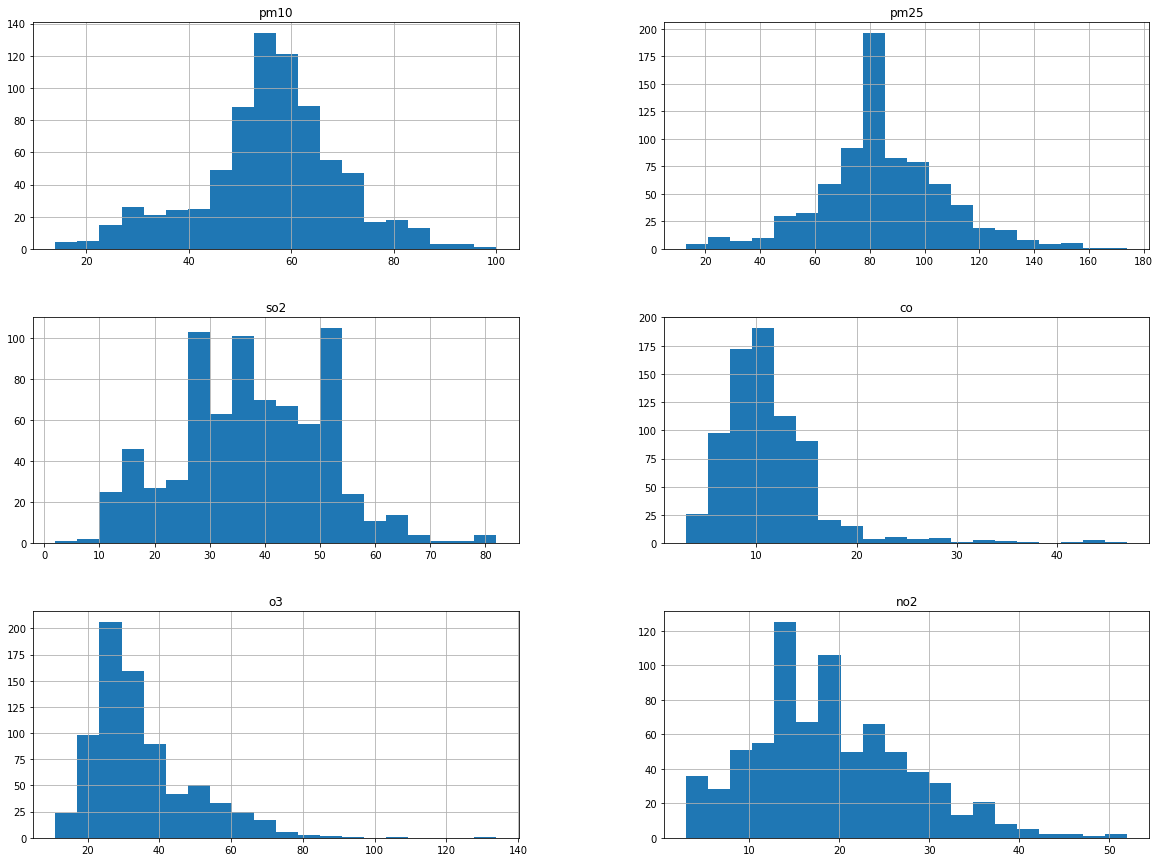

In [38]:
# search for correlation
df.hist(bins=20, figsize=(20,15))
plt.show()

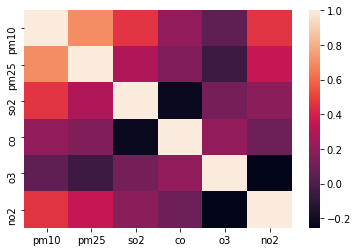

In [39]:
# search for correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

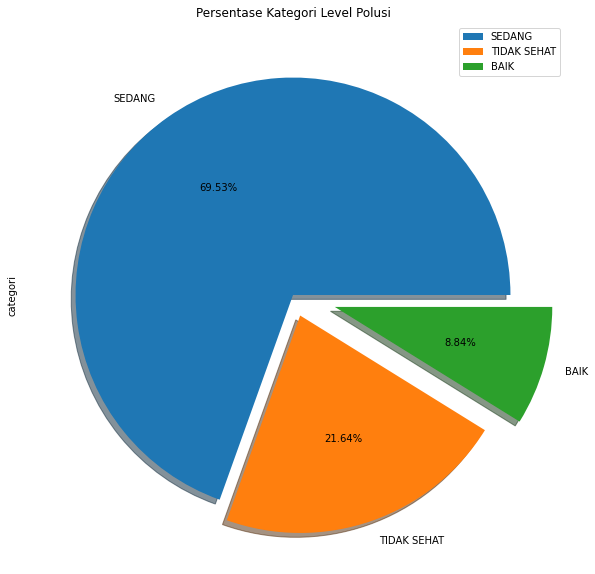

In [40]:
# visualize the percentage of pollution level categories
plt.figure(figsize=(10,10))
df['categori'].value_counts().plot.pie(shadow=True, explode = [0,0.1, 0.2],autopct='%1.2f%%')
plt.title("Persentase Kategori Level Polusi")
plt.legend()
plt.show()

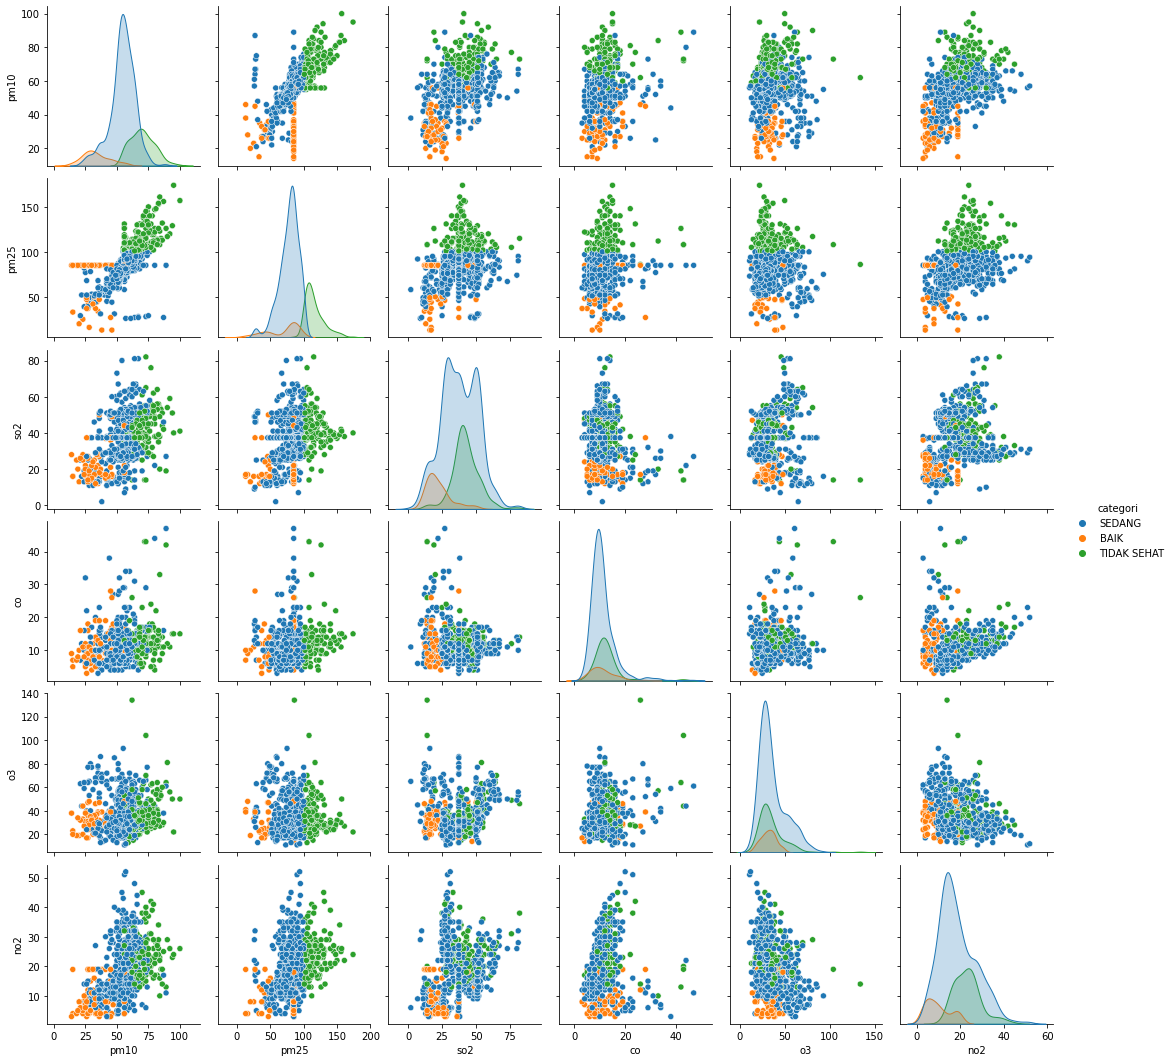

In [41]:
# visualize pairwise relationships in a dataset
sns.pairplot(df,hue='categori')

In [42]:
# gets rows (and/or columns) at integer locations
X=df[['pm10','pm25','so2','co','o3','no2']]
y=df['categori']
y

0      SEDANG
1        BAIK
2      SEDANG
3        BAIK
4      SEDANG
        ...  
753    SEDANG
754    SEDANG
755    SEDANG
756    SEDANG
757    SEDANG
Name: categori, Length: 758, dtype: object

**Naive Bayes Classification**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification


X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=101)

Making a confusion matrix

In [44]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression

from sklearn import linear_model
#summarizing the performance of a classification algorithm

# gaussian = GaussianNB()
# gaussian.fit(X_train, y_train)
# Y_pred = gaussian.predict(X_test) 
# accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
# acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

# cm = confusion_matrix(y_test, Y_pred)
# accuracy = accuracy_score(y_test,Y_pred)
# precision =precision_score(y_test, Y_pred,average='micro')
# recall = recall_score(y_test, Y_pred,average='micro')
# f1 = f1_score(y_test,Y_pred,average='micro')

# print('Confusion matrix for Naive Bayes\n',cm)
# print('accuracy_Naive Bayes: %.3f' %accuracy)
# print('precision_Naive Bayes: %.3f' %precision)
# print('recall_Naive Bayes: %.3f' %recall)
# print('f1-score_Naive Bayes : %.3f' %f1)


logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)



Confusion matrix for Logistic Regression
 [[  9   5   0]
 [  2 107   0]
 [  0   1  28]]
accuracy_Logistic Regression : 0.947
precision_Logistic Regression : 0.947
recall_Logistic Regression: 0.947
f1-score_Logistic Regression : 0.947


In [45]:
# calculate the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

        BAIK       0.82      0.64      0.72        14
      SEDANG       0.95      0.98      0.96       109
 TIDAK SEHAT       1.00      0.97      0.98        29

    accuracy                           0.95       152
   macro avg       0.92      0.86      0.89       152
weighted avg       0.95      0.95      0.95       152



In [46]:
# calculate the mislabeled points out
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != Y_pred).sum()))

Number of mislabeled points out of a total 152 points : 8


In [47]:
import pickle

In [48]:
#save the model as pickle
with open('logreg.pkl','wb') as f:
    pickle.dump(logreg,f)

In [49]:
#load model
with open('logreg.pkl','rb') as f:
    clf_loaded=pickle.load(f)

In [50]:
#  #checking the model
model=pickle.load(open('logreg.pkl','rb'))
print(model.predict([[27,46,27,7,47,7]]))

['BAIK']
